## Importations

In [49]:
%matplotlib notebook
import sympy as s
import math as m
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing()

# I/ Résolution du système T.O.V. pour une étoile homogène

## 1) Extérieur de l'étoile

## 2) Intérieur de l'étoile

### a) Expression du système T.O.V.

L'équation d'Einstein se ramène dans le cas de l'intérieur d'une étoile homogène sphèrique au système suivant :
$\begin{cases}
\frac{dm}{dr} = 4 \pi r^{2} \rho\\
\frac{dP}{dr} = - (\rho + \frac{P(r)}{c^{2}}) \frac{d\phi}{dr}\\
\frac{d\phi}{dr} = \frac{G m(r)}{r^{2}} \frac{(1 + 4 \pi \frac{P(r) r^{3}}{m(r) c^{2}})}{1 - 2 \frac{G m(r)}{c^{2}}}\\
\end{cases}$.

### b) Calcul de $m(r)$

L'équation qui permet de trouver $m(r)$ est $\frac{dm}{dr} = 4 \pi r^{2} \rho(r)$. Elle s'intègre aisement.

In [2]:
r, rho = s.symbols('r rho')
m = s.Function("m")
eq = m(r).diff(r, 1) - 4 * s.pi * rho * r**2
m_sol = s.dsolve(eq, m(r))
s.pprint(s.simplify(m_sol))

                 3  
            4⋅π⋅r ⋅ρ
m(r) = C₁ + ────────
               3    


Clairement $C_{1} = 0$ donc $m(r) = \frac{4 \pi \rho r^{3}}{3} = M \times (\frac{r}{R})^{3}$

### c) Calcul de $P(r)$

L'équation qui permet de trouver $P(r)$ est $\frac{dP}{dr} = - \frac{G m(r)}{r^{2}} \frac{(\rho(r) + \frac{P(r)}{c^{2}})(1 + 4 \pi \frac{P(r)r^{3}}{m(r)c^{2}})}{1 - 2 \frac{G m(r)}{c^{2}}}$.

On adimensionalise cette équation en posant $a = \frac{G M}{R c^{2}}$ , $x = \frac{r}{R}$ et $u(x) = \frac{P(x)}{\rho c^{2}}$. On a alors l'équation $\frac{du}{dx} = - a x \frac{(1 + u)(1 + 3u)}{1 - 2 a x^{2}}$. On cherche la solution telle que $u(1) = 0$ (équation de continuité de la pression à la surface de l'étoile).

In [3]:
x = s.symbols('x')
u = s.Function("u")
a = s.symbols('a')
eq = u(x).diff(x, 1) + a * x * (1 + u(x)) * (1 + 3 * u(x)) / (1 - 2 * a * x**2)
u_sol = s.dsolve(eq, u(x), ics = {u(1) : 0})
print(s.latex(u_sol))

u{\left(x \right)} = \frac{\frac{2 a x^{2}}{3 \left(2 a - 1\right)} + \frac{2 \sqrt{\frac{2 a x^{2} - 1}{2 a - 1}}}{3} - 1 - \frac{1}{3 \left(2 a - 1\right)}}{3 \left(- \frac{2 a x^{2}}{9 \left(2 a - 1\right)} + 1 + \frac{1}{9 \left(2 a - 1\right)}\right)}


Le calculateur formel de Python donne $u{\left(x \right)} = \frac{\frac{2 a x^{2}}{3 \left(2 a - 1\right)} + \frac{2 \sqrt{\frac{2 a x^{2} - 1}{2 a - 1}}}{3} - 1 - \frac{1}{3 \left(2 a - 1\right)}}{3 \left(- \frac{2 a x^{2}}{9 \left(2 a - 1\right)} + 1 + \frac{1}{9 \left(2 a - 1\right)}\right)}$ qui peut se réecrire $u{\left(x \right)} = \frac{- 3 \left(2 a - 1 \right) + (2 a x^{2} - 1) + 2 \sqrt{(2 a x^{2} - 1)(2 a - 1)}}{\left(- (2 a x^{2} - 1) + 9 \left(2 a - 1\right) \right)}$, puis comme on a $a < 1/2$ on prefère l'écriture $u{\left(x \right)} = \frac{- 3 \left(1 - 2 a \right) + (1 - 2 a x^{2}) + 2 \sqrt{(1 - 2 a x^{2})(1 - 2 a)}}{\left(9 \left(1 - 2 a\right) - (1 - 2 a x^{2})\right)}$.

On pose $a = 3 \sqrt{ (1 - 2a)}$ et $b = \sqrt{1 - 2 a x^{2}}$ pour avoir $u(x) = \frac{- \frac{a^{2}}{3} + b^{2} + 2 \frac{ab}{3}}{a^{2} - b^{2}}$. On peut alors aisement remarquer que $u(x) = \frac{(\frac{a}{3} + b)^{2} - (\frac{2}{3}a)^{2}}{(a + b)(a - b)} = - \frac{(a + b)(\frac{a}{3} - b)}{(a + b)(a - b)} = \frac{b - \frac{a}{3}}{a - b}$

Finalement, on trouve $u(x) = \frac{\sqrt{1 - 2 a x^{2}} - \sqrt{1 - 2 a}}{3\sqrt{1 - 2 a} - \sqrt{1 - 2 a x^{2}}}$ et donc $P(r) = \rho c^{2} \frac{\sqrt{1 - 2 a x^{2}} - \sqrt{1 - 2 a}}{3 \sqrt{1 - 2 a} - \sqrt{1 - 2 a x^{2}}}$.

## d) Calcul de $\phi(r)$

L'équation qui permet de trouver $\phi$ est $\frac{d\phi}{dr} = \frac{G m(r)}{r^{2}} \frac{(1 + 4 \pi \frac{P(r) r^{3}}{m(r) c^{2}})}{1 - 2 \frac{G m(r)}{c^{2}}}$. On l'adimensionalise de même pour obtenir $\frac{dv}{dx} = a x \frac{1 + 3 \frac{\sqrt{1 - 2 a x^{2}} - \sqrt{1 - 2 a}}{3 \sqrt{1 - 2 a} - \sqrt{1 - 2 a x^{2}}}}{1 - 2 a x^{2}}$ et l'on cherche la solution pour laquelle $v(1) = \frac{1}{2}\ln{(1 - 2a)}$  (équation de continuité du potentiel à la surface).

In [5]:
x = s.symbols('x')
v = s.Function("v")
a = s.symbols('a')
eq = v(x).diff(x, 1) - a * x * (1 + 3 * (s.sqrt(1 - 2 * a * x**2) - s.sqrt(1 - 2 * a)) / (3 * s.sqrt(1 - 2 * a) - s.sqrt(1 - 2 * a * x**2))) / ( 1 - 2 * a * x**2)
v_sol = s.dsolve(eq, v(x), ics = {v(1) : s.ln(1 - 2 * a) / 2})
print(s.latex(v_sol))

v{\left(x \right)} = 2 a \left(\begin{cases} \frac{\log{\left(- 6 a \sqrt{1 - 2 a} + 2 a \sqrt{- 2 a x^{2} + 1} \right)}}{2 a} & \text{for}\: a \neq 0 \\\tilde{\infty} \sqrt{- 2 a x^{2} + 1} & \text{otherwise} \end{cases}\right) + \begin{cases} - \log{\left(- 4 a \sqrt{1 - 2 a} \right)} + \frac{\log{\left(1 - 2 a \right)}}{2} & \text{for}\: a \neq 0 \\\frac{\tilde{\infty} a \sqrt{1 - 2 a} + \log{\left(1 - 2 a \right)}}{2} & \text{otherwise} \end{cases}


Le calculateur formel de Python donne $v{\left(x \right)} = 2 a \left(\begin{cases} \frac{\log{\left(- 6 a \sqrt{1 - 2 a} + 2 a \sqrt{- 2 a x^{2} + 1} \right)}}{2 a} & \text{for}\: a \neq 0 \\\tilde{\infty} \sqrt{- 2 a x^{2} + 1} & \text{otherwise} \end{cases}\right) + \begin{cases} - \log{\left(- 4 a \sqrt{1 - 2 a} \right)} + \frac{\log{\left(1 - 2 a \right)}}{2} & \text{for}\: a \neq 0 \\\frac{\tilde{\infty} a \sqrt{1 - 2 a} + \log{\left(1 - 2 a \right)}}{2} & \text{otherwise} \end{cases}$

Clairement le cas physique est $a \ne 0$ pour lequel on a $v(x) = \ln{(\frac{(\sqrt{1 - 2 a})(2 a \sqrt{1 - 2 a x^{2}} - 6 a \sqrt{1 - 2 a})}{ - 4 a \sqrt{1 - 2 a}})} = \ln{(\frac{3 \sqrt{1 - 2 a} - \sqrt{1 - 2 a x^{2}}}{2})}$ et donc $\phi(r) = c^{2} \ln{(\frac{3 \sqrt{1 -2 a} - \sqrt{1 -2 a x^{2}}}{2})}$.

## 3) Solution complète de l'équation d'Einstein

On récapitule les résultats obtenus jusque ici :

$\rho = c^{st}$

$m(r) = \begin{cases} M (\frac{r}{R})^{3} & \text{for}\: r \leqslant R \\ M & \text{for}\: r > R \end{cases}$

$P(r) = \begin{cases} \rho c^{2} \frac{\sqrt{1 - 2 a x^{2}} - \sqrt{1 - 2 a}}{3 \sqrt{1 - 2 a} - \sqrt{1 - 2 a x^{2}}} \text{for}\: r \leqslant R \\ 0 & \text{for}\: r > R \end{cases} $

$\phi(r) = \begin{cases} c^{2} \ln{(\frac{3 \sqrt{1 -2 a} - \sqrt{1 -2 a x^{2}}}{2})} & \text{for}\: r \leqslant R \\ c^{2} \ln{(1 - 2 a x^{2})} & \text{for}\: r > R \end{cases} $

il faut ici noter que si l'on a $a \geq 1/2$ alors les équations de Schwarzchild ne sont plus valide. Et si l'on a $a \geq 4/9$ alors c'est les solution à ces équations qui ne sont plus acceptables physiquement car on obtient une pression infinie en 0 (singularité). Ainsi, en relativité générale, il y a une masse maximale pour un objet sphèrique homogène.

On se place donc pour $a < 4/9$ et l'on introduit maintenant les fonctions $N(r) = \begin{cases} e^{\frac{\phi(r)}{c^{2}}} & \text{for}\: r \leqslant R \\ \sqrt{1 - 2 \frac{G M}{r c^{2}}} & \text{for}\: r > R \end{cases}$ et $A(r) = \frac{1}{\sqrt{1 - 2 \frac{G m(r)}{ c^{2}}}}$ pour écrire la métrique en coordonées circulaires $ds^{2} = N(r) c^{2} dt^{2} - A(r) dr^{2} - r^2 (d\theta^{2} + \sin{(\lambda)}^{2} d\lambda^{2})$.

### a) Géodésiques lumière radiales

On va chercher les géodésiques lumière radiales. Elles sont solution de l'équation $ds^{2} == 0$ car de genre lumière. On a donc 2 équations différentielles possibles :
$\frac{dr}{dt} = + c \left| \frac{N(r)}{A(r)} \right|$ ou $\frac{dr}{dt} = - c \left| \frac{N(r)}{A(r)} \right|$. Une courbe n'est solution que d'une de ses équations car $r(t)$ doit être $\mathcal{C}^{2}$.

Etudions la première équation, en l'adimensionalisant grace à $a$, $x$ et $t' = c t / R$ : 

A l'extérieur de l'étoile on a $\frac{dx}{dt'} = (1 - \frac{2 a}{x})$. Il se trouve que l'intégration est plus simple sous la forme $\frac{d x^{2}}{dt'} = 2 \sqrt{x^{2}} - 4 a$.

In [20]:
t = s.symbols('t')
w = s.Function("w")
a, w0 = s.symbols('a w0')
eq = w(t).diff(t, 1) - 2 * s.sqrt(w(t)) + 4 * a
w_sol = s.dsolve(eq, w(t), ics = {w(0) : w0})
print(s.latex(w_sol))

- 4 a \log{\left(- 2 a + \sqrt{w{\left(t \right)}} \right)} + 2 t - 2 \sqrt{w{\left(t \right)}} = - 4 a \log{\left(- 2 a + \sqrt{w_{0}} \right)} - 2 \sqrt{w_{0}}


On trouve que la quantité $- 4 a \log{(- 2 a + x)} + 2 t' - 2 x$ est conservée. Donc $x + 2 a \log{(x - 2 a)} = t' + x_{0} + 2 a \log{(x_{0} - 2 a)}$.

Remarque : La fonction $x + 2 a \log{(x - 2 a)}$ est clairement croissante quel que soit $a$, donc l'équation a bien une solution pour tout t'. En revanche cette solution n'est pas analytique.

En revanche, l'expression que l'on a est suffisante pour tracer les géodésiques lumière analytiquement dans le plan $(x,t')$ :

<IPython.core.display.Javascript object>


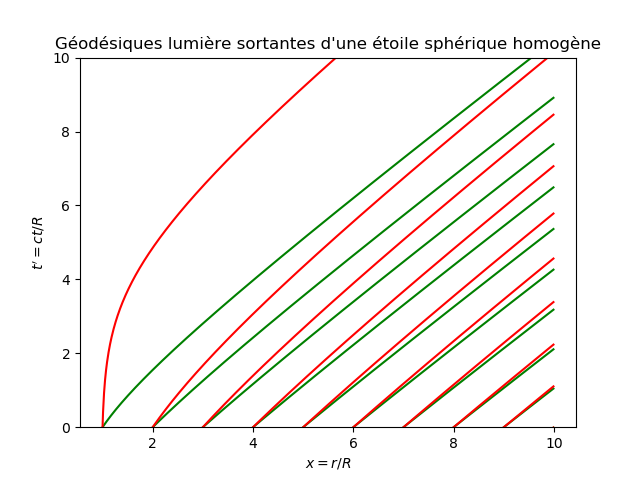

Text(0.5, 1.0, "Géodésiques lumière sortantes d'une étoile sphérique homogène")

In [60]:
plt.figure(1)
a1 = 0.25
a2 = 0.33
a3 = 4/9
a4 = 0.49
X = [1 + i/100 for i in range(900)]

for x0 in range(1, 11):
    T1 = [x + 2 * a1 * m.log(x - 2 * a1) - x0 - 2 * a1 * m.log(x0 - 2 * a1) for x in X]
    T2 = [x + 2 * a2 * m.log(x - 2 * a2) - x0 - 2 * a2 * m.log(x0 - 2 * a2) for x in X]
    T3 = [x + 2 * a3 * m.log(x - 2 * a3) - x0 - 2 * a3 * m.log(x0 - 2 * a3) for x in X]
    T4 = [x + 2 * a4 * m.log(x - 2 * a4) - x0 - 2 * a4 * m.log(x0 - 2 * a4) for x in X]
    plt.plot(X, T1, 'g', label = "a = 1/4")
    #plt.plot(X, T2, 'y', label = "a = 1/3")
    #plt.plot(X, T3, 'orange', label = "a = 4/9")
    plt.plot(X, T4, 'r', label = "a = 1/2 - $\epsilon$")

axes = plt.gca()
axes.set_ylim(0, 10)
plt.xlabel("$x = r / R$")
plt.ylabel("$t' = c t / R$")
plt.title("Géodésiques lumière sortantes d'une étoile sphérique homogène")

On considère maintenant les géodésiques rentrantes, pour lesquelles l'équation réduite est $\frac{dx}{dt'} = (\frac{2 a}{x} - 1)$ qui se simplifie en $\frac{dx^{2}}{dt'} = 4 a - 2 \sqrt{x^{2}}$.

In [47]:
t = s.symbols('t')
w = s.Function("w")
a, w0 = s.symbols('a w0')
eq = w(t).diff(t, 1) + 2 * s.sqrt(w(t)) - 4 * a
w_sol = s.dsolve(eq, w(t), ics = {w(0) : w0})
print(s.latex(w_sol))

- 4 a \log{\left(- 2 a + \sqrt{w{\left(t \right)}} \right)} - 2 t - 2 \sqrt{w{\left(t \right)}} = - 4 a \log{\left(- 2 a + \sqrt{w_{0}} \right)} - 2 \sqrt{w_{0}}


On obtient de même que la quantitée $t' + x + 2 a \ln{(x - 2 a)}$ est conservée. On peut donc à nouveau tracer analytiquement ces géodésiques lumière dans le plan $(x, t')$ :

<IPython.core.display.Javascript object>


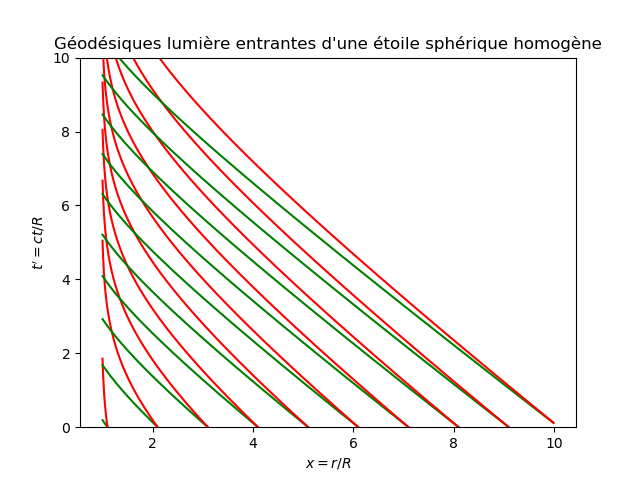

Text(0.5, 1.0, "Géodésiques lumière entrantes d'une étoile sphérique homogène")

In [59]:
plt.figure(2)
a1 = 0.25
a2 = 0.33
a3 = 4/9
a4 = 0.49
X = [1 + i/100 for i in range(900)]

for x0 in range(1, 11):
    T1 = [- x - 2 * a1 * m.log(x - 2 * a1) + (x0 + 0.1) + 2 * a1 * m.log((x0 + 0.1) - 2 * a1) for x in X]
    T2 = [- x - 2 * a2 * m.log(x - 2 * a2) + (x0 + 0.1) + 2 * a2 * m.log((x0 + 0.1) - 2 * a2) for x in X]
    T3 = [- x - 2 * a3 * m.log(x - 2 * a3) + (x0 + 0.1) + 2 * a3 * m.log((x0 + 0.1) - 2 * a3) for x in X]
    T4 = [- x - 2 * a4 * m.log(x - 2 * a4) + (x0 + 0.1) + 2 * a4 * m.log((x0 + 0.1) - 2 * a4) for x in X]
    plt.plot(X, T1, 'g', label = "a = 1/4")
    #plt.plot(X, T2, 'y', label = "a = 1/3")
    #plt.plot(X, T3, 'orange', label = "a = 4/9")
    plt.plot(X, T4, 'r', label = "a = 1/2 - $\epsilon$")

axes = plt.gca()
axes.set_ylim(0, 10)
plt.xlabel("$x = r / R$")
plt.ylabel("$t' = c t / R$")
plt.title("Géodésiques lumière entrantes d'une étoile sphérique homogène")

### b) Chute libre depuis une vitesse initiale nulle

Au vu des symètries on aura alors une trajectoire purement radiale $r(t)$. On va donc chercher à la représenter elle aussi dans le plan $(x, t)$.
Cette trajectoire est régie par l'équation ?.